# TD 1 : Introduction à R et aux Statistiques descriptives

Christelle Gonindard, Matthias Grenié, et François Bettega

<div class="alert alert-info">

## Objectifs

- Découvrir l'utilisation de R
- Comprendre ce que sont les **fonctions**, les **arguments**, et les **variables**
- Lire un jeu de données sur R
- Calculer des indicateurs de position et de dispersion sur des données
- Visualiser des données quantitatives et qualitatives avec R

</div>

## 1. Introduction

### 1.1 Présentation des attentes des cours et TDs de cette année

Ces Cours-TD sont destinés à vous apporter le recul nécessaire à l’interprétation des analyses
statistiques que vous serez amenés à évaluer au cours de votre cursus et de votre vie professionnelle.
Le plus important est de comprendre le principe de l’analyse utilisée et à se faire sa propre
opinion sur une analyse statistique afin de démêler le vrai du faux. Le but n’est pas de faire de
vous des statisticiens qui vont développer de nouvelles méthodes mais que vous soyez capable
de comprendre et de détecter les erreurs et biais potentiels qui peuvent entrainer une mauvaise
interprétation des données et des conclusions erronées.


### 1.2 Contexte

Comme il est décrit dans le cours, il est important de prendre conscience que les statistiques
sont liées au domaine médical. Elles ont trouvé réellement leur essor et participé aux améliorations
médicales à partir du moment où l’on a essayé de comprendre les causes des maladies, de
la propagation d’une épidémie... 

Vous trouverez ci-dessous une liste non exhaustive de domaines
d’application des statistiques en pharmacie :
- Lors de la mise au point d’un nouveau médicament, trois étapes de vérification doivent être respectées :
    1. Est ce que le nouveau médicament n’est pas toxique pour l’homme?
    2. Est ce que le nouveau médicament est efficace ?
    3. Est ce que le nouveau médicament est plus efficace que les traitements existants ?
- Lors de la mise au point d’un nouveau test diagnostique, d’une nouvelle méthode d’analyse, les questions qui suivent sont posées :
    1. Est ce que le nouveau test diagnostique fait mieux que le simple hasard pour donner un résultat positif à un patient réellement malade ?
    2. Est ce que la nouvelle méthode d’analyse fait aussi bien que la précédente ?
    3. Est ce que le nouveau test diagnostique améliore la sensibilité (capacité à donner un résultat positif à une personne réellement malade ?
- Lors d’une étude épidémiologique, les questions qui suivent sont posées :
    1. Est ce que l’exposition à un facteur a un effet sur la survenue de la maladie ?
    2. Est il possible de prédire le risque de survenue de la maladie à la suite d’une exposition à ce facteur ?
    3. Etudier l’impact d’un traitement sur le décès à 30 jours de patients, toutes choses égales par ailleurs.
- Lors de l’évaluation de la qualité et du contrôle d’une ligne de production
- Lors de l’évaluation des moyens et de l’état de santé d’une population : causes de décès, morbidité, surveillance sanitaire....

En conclusion, en biologie ou en santé, les domaines d’application sont très vastes : essais
cliniques randomisées, études épidémiologiques, dynamiques des populations, études omiques
(génomique, protéomique, transcriptomique, etc.), lignes de productions, etc. Ces études représentent
une masse de données considérable à traiter. Il est donc loin le temps où les calculs statistiques
étaient fait à la main, sur de petits échantillons. Il est nécessaire pour traiter les données d’utiliser
des logiciels informatiques. Pendant cette UE, nous nous servirons du langage de programmation [R](https://www.r-project.org/), qui est un langage de programmation dédié aux statistiques, libre et gratuit. C'est aujourd'hui le langage de programmation de référence pour produire des statistiques, des figures, et des rapports associés. Il est aussi bien utilisé dans le monde académique que dans les administrations publiques (INSEE, ANSES), que par des acteurs privés (par ex. les laboratoires pharmaceutiques).

L'objectif de cette UE vous demande de :
- mobiliser vos connaissances biologiques pour comprendre les données et interpréter les résultats, 
- comprendre les principes des différentes méthodes statistiques pour savoir laquelle utiliser en fonction des échantillons et des questions qui sont posées,
- maîtriser la programmation en R car les données à traiter deviennent tellement importantes qu’il est illusoire de vouloir faire les calculs à la main.


## 2. Présentation des données

Lors des trois premiers TD nous allons étudier le même jeu de données. Il s'agit d'un jeu de données qui cherche à savoir si l'acupuncture peut avoir un effet sur la dépression.

Un clinicien évalue l’intensité de la dépression sur l’échelle de Hamilton qui varie de 0 (non
déprimé) à 56 (très déprimé), chez 100 patients sourant d’un Episode Dépressif Majeur (EDM).
On veut savoir si l’acupuncture améliore l’évolution de la dépression. Pour cela, 100 malades
de même état dépressif (même score de Hamilton) sont répartis en 2 groupes de 50 par tirage
au sort. Le groupe I a reçu uniquement le traitement pharmacologique et le groupe II a reçu le
traitement pharmacologique associé à de l’acupuncture.

Le jeu de données contient les variables suivantes en colonne :
- `hamilton_g1` : Les scores de Hamilton, après 8 mois de traitement pour le groupe 1 ;
- `hamilton_g2` : Les scores de Hamilton, après 8 mois de traitement pour le groupe 2 ;
- `age_g1` : l’âge des patients du groupe 1 ;
- `age_g2` : l’âge des patients du groupe 2 ;
- `poids_g1` : le poids des patients du groupe 1 ;
- `poids_g2` : le poids des patients du groupe 2 ;
- `sexe_g1` : le sexe des patients du groupe 1 (`"F"` : femme, `"H"` : homme) ;
- `sexe_g2` : le sexe des patients du groupe 2 (`"F"` : femme, `"H"` : homme) ;
- `urbanisation_g1` : le niveau d’urbanisation dans lequel vivent les patients du groupe 1 (`"A"` : rural, `"B"` : urbanisation modéré, `"C"` : fortement urbanisé) ;
- `urbanisation_g2` : le niveau d’urbanisation dans lequel vivent les patients du groupe 2 (`"A"` : rural, `"B"` : urbanisation modéré, `"C"` : fortement urbanisé).

Les données sont contenues dans le fichier texte nommé `depression.txt` qui se trouve dans le dossier `data`. Le chemin d'accès complet du fichier est donc `data/depression.txt`.

Pour lire les données sur R, il faut utiliser la fonction `read.table()`. On appelle **fonction** les instructions de R qui sont déjà existantes et peuvent être réutilisées (par analogie avec les fonctions mathématiques). Certaines fonctions peuvent s'utiliser toutes seules. D'autres nécessitent qu'on précise ce sur quoi on les applique, ce sont les **arguments**.

Ici, `read.table()` nécessite que l'on précise le chemin d'accès du fichier comme premier argument pour pouvoir lire les données, on peut préciser un autre argument appelé `header =` qui permet de dire à R que le fichier contient comme première ligne les entêtes de colonnes.

In [1]:
# L'argument header = TRUE (/!\ Il faut respecter les majuscules /!\)
# qui signifie 'header est vrai' permet de préciser que le fichier de données 
# possède une ligne en début qui correspond au nom des colonnes

read.table("data/depression.txt", header = TRUE)

hamilton_g1,hamilton_g2,urbanisation_g1,urbanisation_g2,age_g1,age_g2,poids_g1,poids_g2,sexe_g1,sexe_g2
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
43,25,B,B,57,48,74,93,F,H
29,29,A,B,37,41,95,92,H,H
34,18,A,A,7,30,84,86,H,H
39,23,A,A,37,41,104,81,H,H
40,24,B,A,15,30,92,74,H,F
41,25,B,B,45,45,85,98,H,H
32,27,A,B,41,41,79,75,H,H
36,16,A,A,33,17,92,90,H,H
35,27,A,B,55,47,76,83,H,H


Pour l'instant on n'a fait que charger et afficher le tableau. Il n'est pas encore utilisable.
Pour le faire il faut créer une **variable** qui contiendra le tableau qu'on utilisera pour le reste de la séance.
Nous pouvons nommer le tableau `depression`. Pour assigner une variable dans R, on peut utiliser le signe `=`, à gauche du signe `=` on indique le nom de la variable, tandis que la droite du signe `=` donne le contenu de la variable.

In [2]:
depression = read.table("data/depression.txt", header = TRUE)

Rien ne s'affiche, c'est **normal**. Car on vient de créer la variable, pour l'afficher il faut utiliser le nom qu'on lui a donné directement :

In [3]:
depression

hamilton_g1,hamilton_g2,urbanisation_g1,urbanisation_g2,age_g1,age_g2,poids_g1,poids_g2,sexe_g1,sexe_g2
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
43,25,B,B,57,48,74,93,F,H
29,29,A,B,37,41,95,92,H,H
34,18,A,A,7,30,84,86,H,H
39,23,A,A,37,41,104,81,H,H
40,24,B,A,15,30,92,74,H,F
41,25,B,B,45,45,85,98,H,H
32,27,A,B,41,41,79,75,H,H
36,16,A,A,33,17,92,90,H,H
35,27,A,B,55,47,76,83,H,H


*Note : si vous cherchez de l'aide en ligne ou ailleurs sur R, vous pouvez voir que certaines personnes assignent des variables avec les caractères `<-`, c'est strictement équivaleut au signe `=`, aussi, par simplicité , dans le reste du cours nous utiliserons le signe `=`*

Un tableau peut contenir plusieurs milliers de lignes tout afficher peut donc être inutile.

La fonction `head()` permet d'afficher les premières lignes d'un tableau (sans autre précision, les **six premières**).

In [4]:
# Afficher le début du contenu du fichier de données 
head(depression)

,hamilton_g1,hamilton_g2,urbanisation_g1,urbanisation_g2,age_g1,age_g2,poids_g1,poids_g2,sexe_g1,sexe_g2
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,43,25,B,B,57,48,74,93,F,H
2,29,29,A,B,37,41,95,92,H,H
3,34,18,A,A,7,30,84,86,H,H
4,39,23,A,A,37,41,104,81,H,H
5,40,24,B,A,15,30,92,74,H,F
6,41,25,B,B,45,45,85,98,H,H


Les tableaux dans R portent le nom de `data.frame`.

Par analogie avec les mathématiques, quand on s'intéresse à un ensemble en une seule dimension, comme une colonne de tableau par exemple, on parle en R de **vecteur**.

Pour extraire une colonne d'un tableau on doit préciser le nom du tableau suivi de `$` suivi du nom de la colonne (**/!\\** en respectant scrupuleusement l'orthographe **/!\\**)

In [5]:
# Pour avoir accès aux colonnes, il faut préciser le nom du fichier
depression$hamilton_g1

[1] 43 29 34 39 40 41 32 36 35 37 43 36 41 37 33 40 38 43 32 32 44 40 36 37 41
[26] 43 37 31 47 41 45 42 46 35 49 33 34 44 40 42 44 40 29 36 42 44 32 37 42 45

## 3. Statistiques descriptives

La statistique descriptive est la première étape primordiale lors d’une analyse statistique,
cette étape va permet bien évidemment de résumer ou représenter les données observées, avec
le moins de mots, chiffres ou graphiques possible, grâce à des outils statistiques simples tels que
la moyenne, la médiane, la variance, les quantiles, le maximum, le minimum....
Elle permet également de vérifier si il n’y a pas de valeurs erronées, de problèmes d’échantillonnage.

Elle a aussi un rôle de suggestion d’hypothèses pour des études plus approfondies ou encore de vérification de condition d’application pour les tests statistiques de l’étude infférentielle qui
suivra.

### 3.1 Les variables aléatoires

Les variables du jeu de données peuvent prendre un certain nombre de valeurs sans que
celles-ci ne puissent être prévues à priori, c’est pour cela qu’elle se nomme variable aléatoire. Il
existe deux types de variables aléatoires :
- Variable qualitative : modalité non mesurable, par exemple la couleur des yeux, le sexe,
le groupe sanguin...
- Variable quantitative : modalité mesurable, par exemple la taille, le taux d’hormones,...

Une variable aléatoire est dite discrète si elle prend que des valeurs discontinues dans un
intervalle donné, comme par exemple le nombre d’enfants dans une famille, le nombre de fumeurs...

Une variable aléatoire est dite continue si elle prend toutes les valeurs dans un intervalle donné,
comme par exemple : la taille, le poids...

Dans notre exemple de cours, les variables hamilton, âge, poids sont des variables **quantitatives**
alors que les variables sexe et uUrbanisation sont des variables **qualitatives**.

### 3.2 Paramètres utilisés en statistique descriptive

Lors de la description d’un jeu de données, deux types de paramètres doivent être utilisés
pour décrire les variables quantitatives : les paramètres de position et les paramètres de dispersion.

#### Paramètres de position

1. la **moyenne** : c’est la somme pondérée des valeurs mesurées 
2. la **médiane** : c’est la valeur qui scinde l’échantillon en deux de telle sorte que 50% desobservations sont supérieures à cette valeur et 50% des observations lui sont inférieures.

Comparaison de ces deux indicateurs :

1. la **moyenne** : c’est l’indicateur familier, intuitif et facile à calculer.
   point faible : il n’est pas robuste =  très sensible au changement d’une ou plusieurs observations et aux valeurs extrêmes
3. la **médiane** : c’est un indicateur à fois précis et robuste = il est peu sensible à la modification d’une ou plusieurs observations ou aux valeurs extrêmes

Remarque : tout au long des TDs vous trouverez dans les encadrés les instructions en langage R pour réaliser les analyses statistiques.

Pour calculer la moyenne d'un vecteur sur R, on doit utiliser la fonction `mean()` (*mean* qui signifie moyenne en Anglais).  
Pour la médiane, il faut utiliser la fonction `median()` (*median* qui signifie médiane en Anglais).

Calculons les moyennes et médianes des scores de Hamilton du groupe 1.

In [24]:
mean(depression$hamilton_g1)
median(depression$hamilton_g1)
sd(depression$hamilton_g1)

[1] 38.78

[1] 40

[1] 4.896021

*Application* : calculer les moyennes et médianes des variables `hamilton_g2`, `age_g1`, et `age_g2`

In [25]:
mean(depression$hamilton_g2)
median(depression$hamilton_g2)
sd(depression$hamilton_g2)

[1] 24.54

[1] 25

[1] 5.006975

On constate que l’âge moyen dans les groupes 1 et 2 sont proches, respectivement environ 40
ans et 37 ans. En revanche, la différence au niveau du score de Hamilton semble plus importante
entre le groupe 1 et 2 avec des scores moyens respectivement de 38.8 et 24.5, et des scores
médians respectivement de 40 et 25. Toutefois, il est important de vérifier la dispersion des
données car même si la la différence de moyenne entre les deux groupes peut sembler importante,
deux cas de figures se présentent :
- si l’écart-type pour les deux groupes est également grand alors cette différence s’amenuise,les données se chevauchent
- si l’écart-type est faible alors les deux groupes ont des données bien distinctes et la différence entre les deux groupes apparait clairement. 

<img src="Figures/Fig_dispersion.jpg" />


#### Paramètres de dispersion

Ils fixent la variabilité des mesures par rapport à un paramètre de position.
1. la **variance** : c’est l’écart par rapport à la moyenne, l'écart-type correspond à la racine de la variance
2. l’**amplitude** : c’est l’écart entre la plus grande et la plus petite valeur observée dans l’échantillon.
3. l’**intervalle inter-quartile** : c’est la plage de valeurs délimitée par le 1er quartile et le 3ème quartile (respectivement Q1 et Q3). Il contient 50% des observations : 25% de part et d’autre de la médiane. Les quartiles sont définis sur le même principe que la médiane (aussi nommé 2ème quartile).

**le premier quartile (Q1)** : c’est la valeur qui scinde l’échantillon en deux de telle sorte que 75% des observations
sont supérieures à cette valeur et 25% des observations lui sont inférieures.

**le troisième quartile (Q3)** : c’est la valeur qui scinde l’échantillon en deux de telle sorte que 25% des observations
sont supérieures à cette valeur et 75% des observations lui sont inférieures.

Si l'on compare ces trois indicateurs, ils ont différentes propriétés :
1. l’écart-type : c’est un indicateur peu robuste, mais facile à calculer et récurrent dans les statistiques inférentielles
2. l’intervalle inter-quartile : c’est un indicateur robuste au même titre que les valeurs qui le caractérisent (quartiles).
3. l’amplitude : facile à calculer, mais très sensible aux valeurs extrêmes (qui sont parfois aberrantes).

Pour calculer l'écart-type d'un vecteur sur R, il faut utiliser la fonction `sd()` (écart-type se dit ***s**tandard **d**eviation* en Anglais).  
Pour l'intervalle inter-quartile et l'amplitude, ils nous sont donnés *via* la fonction `summary()` (résumé en Anglais) qui nous permet d'obtenir un résumé statistique du vecteur.

*Application au jeu de données sur le score de Hamilton :*

In [26]:
summary(depression$hamilton_g1)
sd(depression$hamilton_g1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   35.25   40.00   38.78   42.75   49.00 

[1] 4.896021

Faites de même pour la variable `hamilton_g2`

In [28]:
summary(depression$hamilton_g2)
sd(depression$hamilton_g2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   20.50   25.00   24.54   28.00   36.00 

[1] 5.006975

**En conclusion** :  



Cette hypothèse pourra ensuite être testée dans les TDs suivants par un test de comparaison de
moyennes.

### 3.3 Représentation des variables quantitatives

#### Histogramme

L’histogramme est un moyen rapide pour étudier la répartition d’une variable.  
Cependant, il faut faire attention car la forme de l’histogramme change en fonction de l’amplitude
des classes, il faut tester plusieurs découpages différents.

[Philippe Besse (Professeur de Statistiques, auteur du site WikiStat)](http://wikistat.fr/) :
> La qualité de l’estimation d’une distribution par un histogramme dépend beaucoup
du découpage en classes.  
> Malheureusement, plutôt que de fournir des classes d’effectifs égaux
et donc de mieux répartir l’imprécision, les logiciels utilisent des classes d’amplitudes égales et
tracent donc des histogrammes parfois peu représentatifs.

Pour représenter un histogramme sur R, il faut utiliser la fonction `hist()` en donnant comme argument le vecteur duquel on veut l'histogramme.

*Application au jeu de données sur le score de Hamilton :*

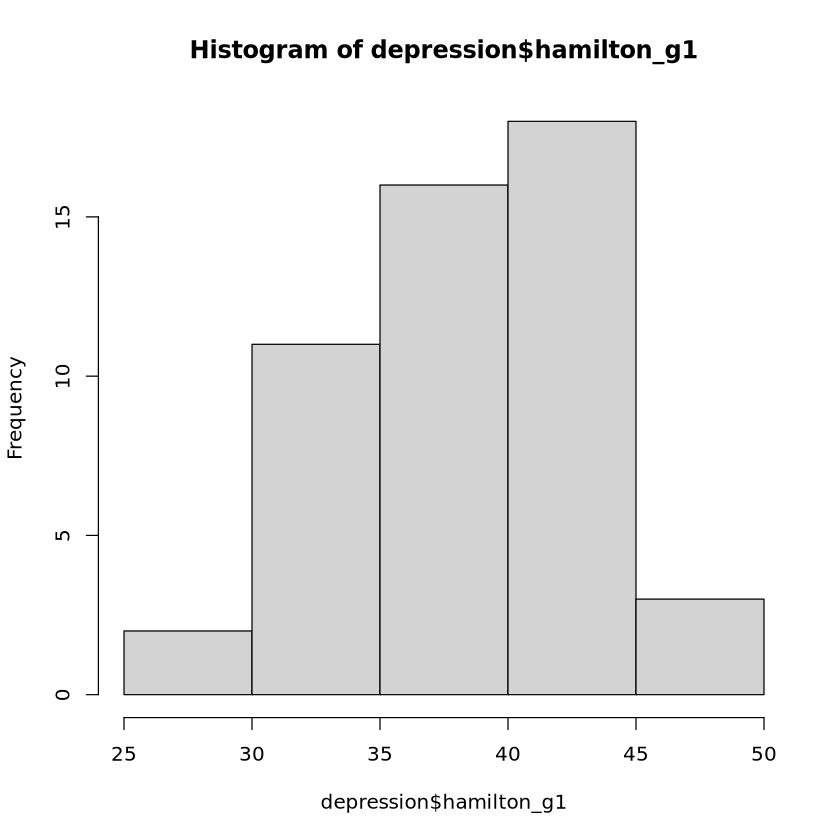

In [29]:
# tracer de l'histogramme représentant la variable hamilton_g1
hist(depression$hamilton_g1)

Tracer l'histogramme de la colonne `hamilton_g2` et comparer avec l'histogramme de la colonne `hamilton_g1`

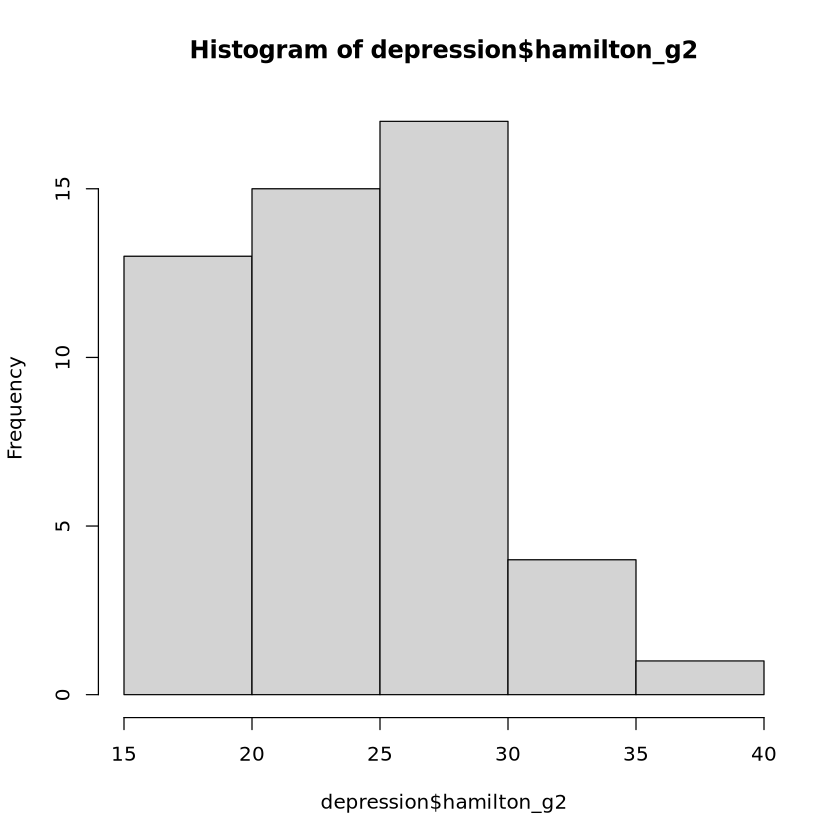

In [30]:
# tracer de l'histogramme représentant la variable hamilton_g2
hist(depression$hamilton_g2)

Ces histogrammes montrent une répartition disymétrique du score de Hamilton pour les
groupes g1 et g2 avec un **mode** (c'est-à-dire la valeur ou classe la plus fréquente) respectivement aux alentours de 40-45 et 25-30.

On peut choisir le nombre de classes de l’histogramme avec l'argument `n=` suivi d'un nombre, ce qui permet d’augmenter (ou de réduire)
la précision du graphique.

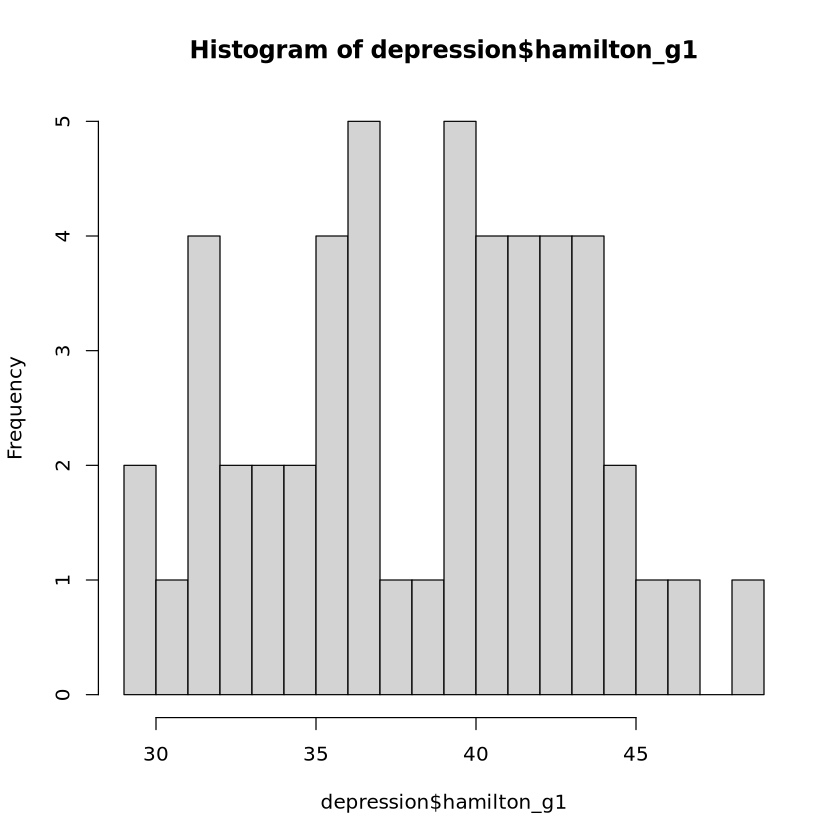

In [35]:
# tracer de l'histogramme représentant la variable hamilton_g1, en choisissant 15 classes grâce à l'argument n=15
hist(depression$hamilton_g1,n=15)

Retracer l'histogramme de la variable `hamilton_g2` avec 15 classes

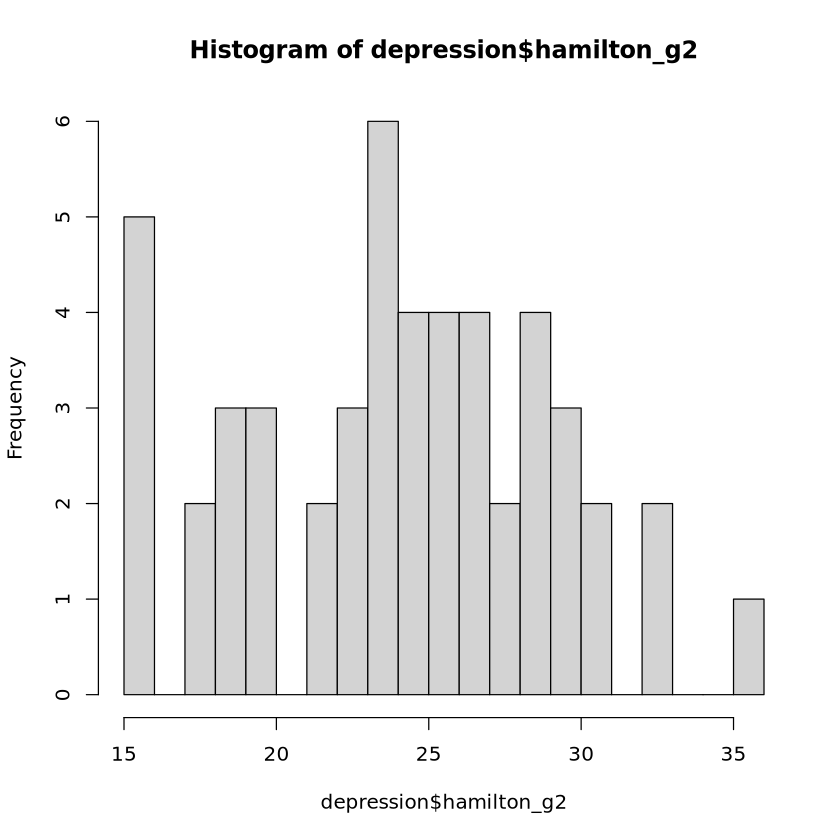

In [36]:
hist(depression$hamilton_g2,n=15)

Ces histogrammes ont été obtenus à partir des mêmes données que les histogrammes précédents,
seul le nombre de classes a été changé. Les deux distributions semblent pourtant très
différentes.  
Il est important d’ajuster le nombre de classes en fonction de la taille de l’échantillon.

#### *boxplot* (ou diagramme en boîte à moustaches)

Ce type de graphique permet de résumer une série statistiques, d’identifier
les valeurs extrêmes, de comprendre la répartition des observations (dispersion et symétrie)
d’une variable ou encore de comparer la répartition des données d’une même variable entre plusieurs
échantillons.

- La valeur centrale du graphique est la **médiane** (il existe autant de valeurs supérieures qu’inférieures à cette valeur dans l’échantillon), on la représente par une barre plus épaisse.
- Les bords du rectangle sont les quartiles **Q1** et **Q3** (Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quart ont des valeurs plus grandes, le bord supérieur suit le même raisonnement).
- Les extrémités des moustaches sont calculées en utilisant 1.5 fois l’espace interquartile (Q3 - Q1).
On peut remarquer que 50% des observations se trouvent à l’intérieur de la boîte (et donc 50% en dehors !).

Les valeurs à l’extérieur des moustaches sont représentées par des points. Ces valeurs peuvent
être décrites comme extrêmes par rapport aux autres valeurs de l’échantillon. Toutefois, il ne
faut pas faire de raccourci rapide et en déduire que se sont forcément des valeurs aberrantes.
Par contre, cela peut indiquer qu’il faut étudier ces observations plus en détails.

Pour représenter un *boxplot* sous R il faut utiliser la fonction `boxplot()` en donnant comme argument la série statistique que l'on souhaite représenter.  

*Application au jeu de données sur le score de Hamilton :*

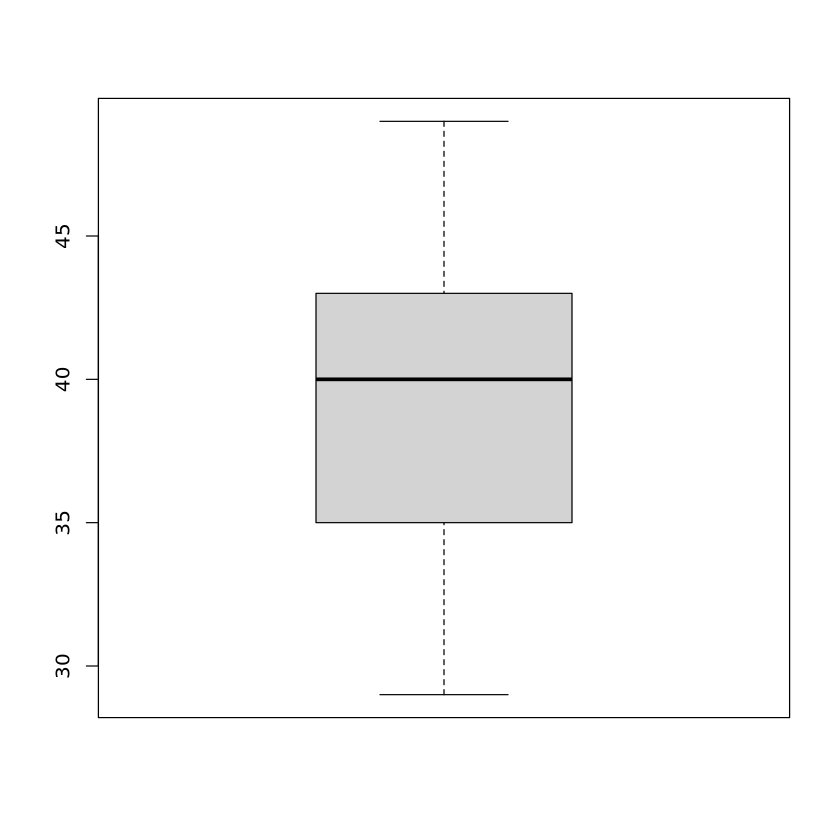

In [37]:
# l'argument main permet de préciser un titre
# l'argument ylab permet de préciser un titre à l'axe de y
boxplot(depression$hamilton_g1)

Les graphiques de R par défaut utilisent les noms de variables fournies pour donner des titres aux axes et aux graphiques. Pour les modifier, on peut utiliser les argumants `main=` pour donner le titre général du graphique et l'argument `ylab=` pour nommer l'axe des ordonnées (raccourci de ***y**-axis **lab**el*).
Il faut fournir ces titres en écrivant entre guillemets `"`

Reprenez le boxplot ci-dessus et donnez lui un titre et nommez l'axe des ordonnées

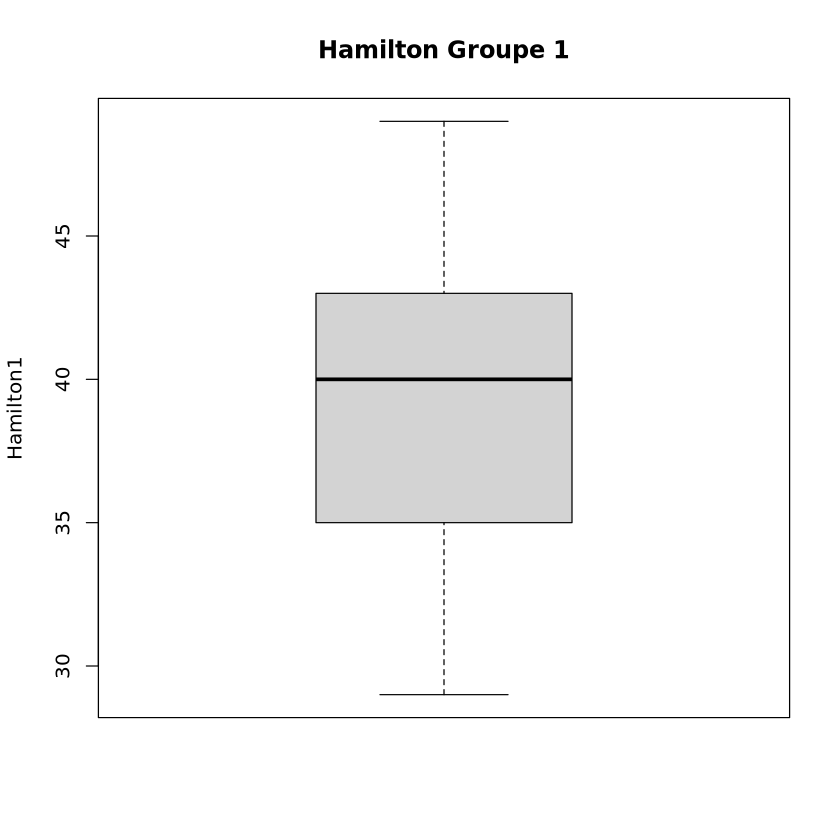

In [38]:
boxplot(depression$hamilton_g1,main="Hamilton Groupe 1", ylab="Hamilton1")

De la même façon, tracez le boxplot de la variable `hamilton_g2`

Il est possible de regrouper les deux boxplots sur la même figure en donnant les deux séries statistiques d'affilées à la fonction `boxplot()`.
On peut préciser l'axe des abscisses avec l'argument `xlab=` (pour ***x**-axis **lab**el*)

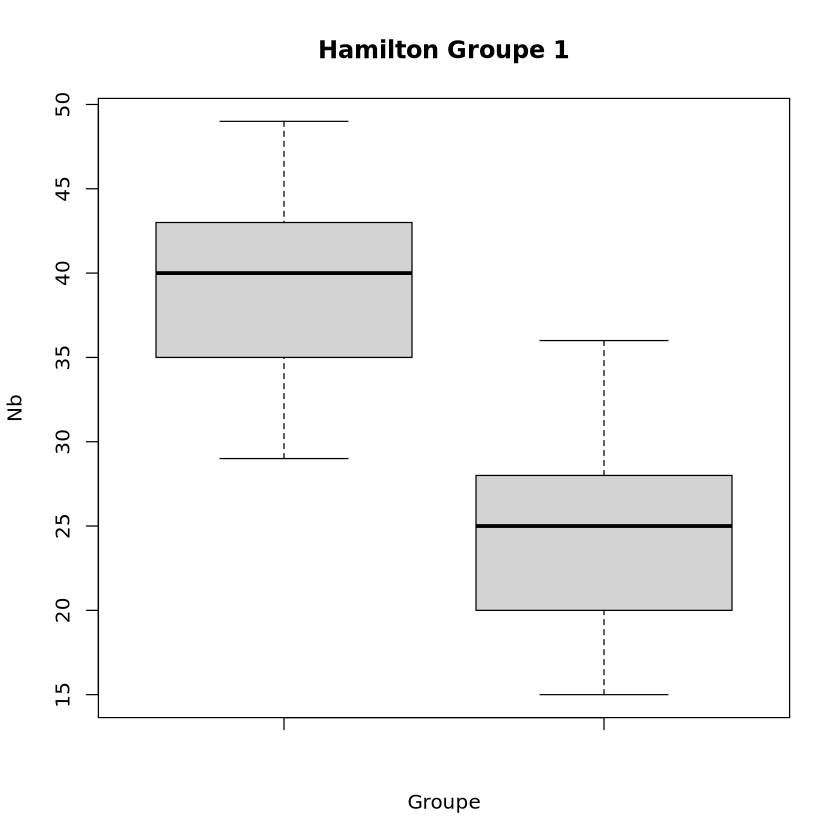

In [40]:
# On peut les annoter de la même façon
boxplot(depression$hamilton_g1,depression$hamilton_g2,main="Hamilton Groupe 1", ylab="Nb", xlab="Groupe")

Seulement les noms de groupes n'apparaissent plus, pour ce faire on peut utiliser l'argument `names=` suivi d'un vecteur de nom.

Pour créer un vecteur de nom il faut utiliser la fonction `c()` en séparant les noms entre guillemets `"` par des virgules, par exemple `c("A", "B")`.

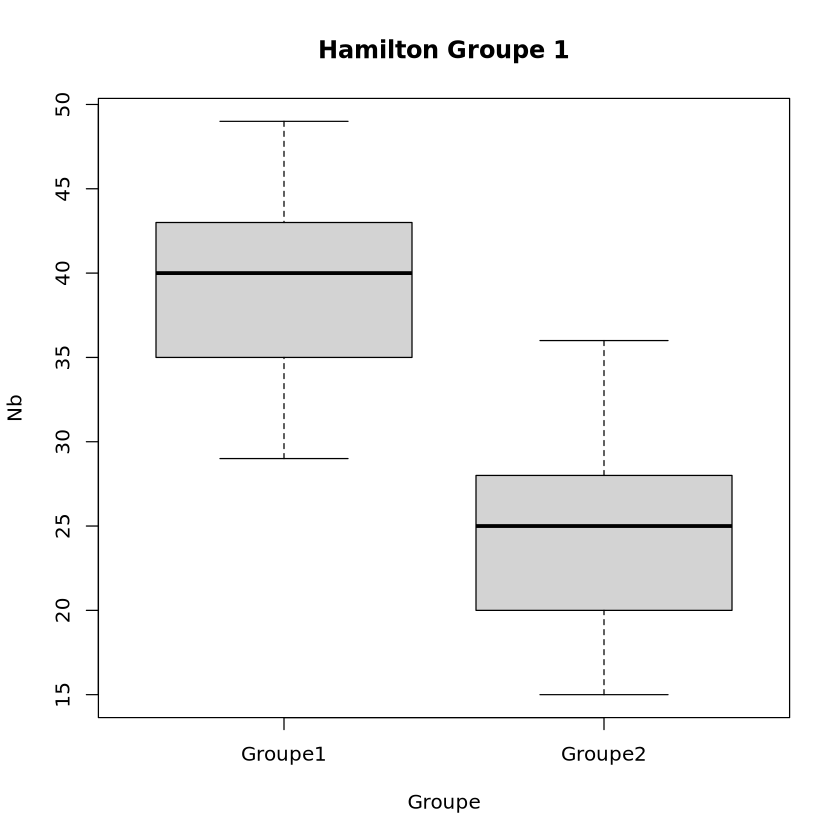

In [41]:
boxplot(depression$hamilton_g1,depression$hamilton_g2,main="Hamilton Groupe 1", ylab="Nb", xlab="Groupe", names=c("Groupe1","Groupe2"))

*Note : pour faciliter la lecture du code, n'hésitez pas à revenir à la ligne après chaque virgule dans les fonctions, cela permettra d'aérer votre code et d'identifier plus rapidement les bugs*

**Interprétation** :


### 3.4 Représentation des variables qualitatives

La description d’une variable qualitative passe par la présentation de ces effectifs par classes (on regroupe les observations qui de la même modalité).
Cette étape va permettre de vérifier la répartition des effectifs (= le nombre d'observations) entre les classes. Ainsi, si une variable possède des effectifs très déséquilibrés entre ces classes, il faudra
en tenir compte dans les tests à venir, et, parfois, procéder à des regroupements entre classess.

Pour obtenir les effectifs d'une variable qualitative sur R, il faut utiliser la fonction `table()` qui prend comme argument la variable qualitative à étudier.

*Application au jeu de données sur la variable `urbanisation_g1` :*

In [46]:
# la fonction table compte les effectifs des modalités de la variable
repartition1=table(depression$urbanisation_g1)
# afficher le résultat
repartition1


 A  B  C 
24 21  5 

Calculer les effectifs de la variable `urbanisation_g2` et commentez les résultats

In [47]:
# la fonction table compte les effectifs des modalités de la variable
repartition2=table(depression$urbanisation_g2)
# afficher le résultat
repartition2


 A  B 
24 26 

**Commentaire** :



#### *barplot* (ou diagramme en barres)

Il s'agit d'un graphique on l'on représente la fréquence d’observation ou les effectifs de chacune des modalités
de la variable considérée. La hauteur des barres est proportionnelle à ceux-ci. Contrairement aux histogrammes, les bâtons des diagrammes
en barre sont bien séparés pour mettre l’accent sur le caractère discret des observations
(par opposition à la contiguité des barres d’un histogramme qui fait écho à la nature continue de
la variable).

Pour l'utiliser sur R, il faut utiliser la fonction `barplot()` qui prend comme premier argument le **tableau d'effectifs de la variable qualitative**, comme il s'agit d'une fonction graphique, on peut annoter le graphique de la même façon que précédemment avec les arguments `main=`, `xlab=`, et `ylab=`.

*Application au jeu de données sur la variable `urbanisation_g1` :*

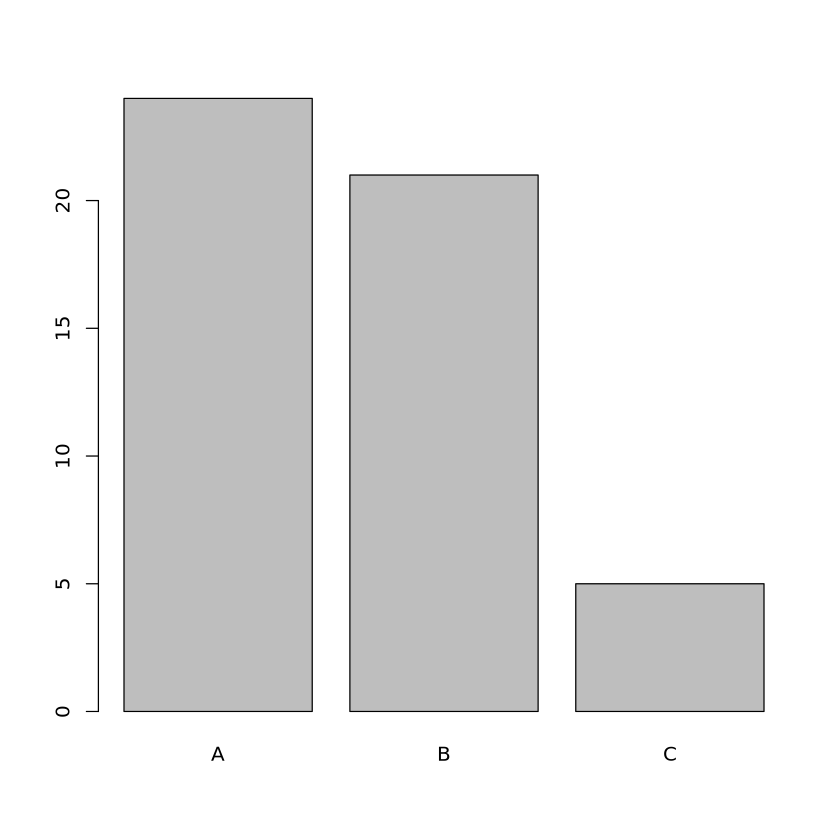

In [48]:
barplot(repartition1)

Tracer le barplot représentant les effectifs de la variable `urbanisation_g2` et commentez 

**Commentaire** :



#### Camemberts (ou diagramme circulaire)

Le camembert permet de représenter les différentes modalités par secteurs angulaires proportionnels
aux fréquences observées.  
Les représentations en camembert sont à utiliser avec modération c’est à dire uniquement lorsqu’il
y a peu de modalités à représenter. En effet, plus il y a de modalités plus il est difficile de lire les proportions sur le graphique. En outre, les camemberts ne représentent que les proportions relatives entre modalités et pas le nombre absolu (contrairement à un diagramme en barres).

Pour représenter un camembert sur R, on peut utiliser la fonction `pie()` (de ***pie** chart* en Anglais, littéralement diagramme en tarte = camembert).  
Cette fonction prend comme premier argument les **effectifs** de la variable qualitative à représenter. Comme c'est une fonction graphique on peut utiliser les autres arguments habituels des fonctions graphiques.

*Application au jeu de données sur la variable `urbanisation_g1`*

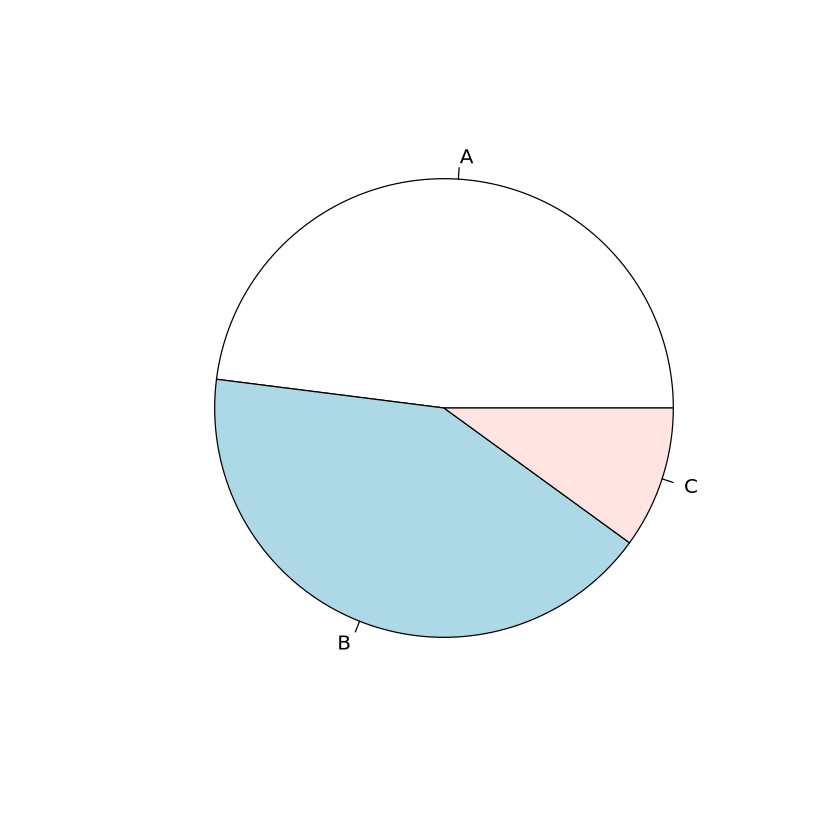

In [49]:
pie(repartition1)

Tracer le camenbert représentant les effectifs de la variable `urbanisation_g2` et commentez 

**Commentaire :**



## 4. Manipulation de données

###  4.1 Extraction directe

Il est possible avec **R** d’extraire des valeurs particulières d’un tableau (*data.frame*). Pour cela, il faut être conscient qu’un tableau est composé de lignes et de colonnes, chaque
valeur du tableau a donc un numéro de ligne *i* et un numéro de colonne *j*. 

Pour extraire une valeur particulière du tableau, il suffit de préciser à **R** son numéro de ligne et de colonne. Par
exemple, nous allons extraire la valeur à la ligne 2 dans la colonne 3 :

In [50]:
# Extraire la valeur de la ligne 2 en colonne 3
# les [] permettent d'extraire une sous partie du tableau
# ce qui est avant la virgule correspond aux lignes et ce qui est après la virgule correspond aux colonnes
depression[2,3]

[1] "A"

Application : Extraire la valeur du tableau qui se situe à la ligne 15 dans la colonne 4

In [51]:
depression[15,4]

[1] "A"

On peut aussi extraire toute une ligne ou tout une colonne en ne mettant rien à la place de l'indice de ligne ou de colonne respectivement (**Atttention il faut tout même garder la virgule dans les crochets**).

Par exemple, on peut extraire toute la deuxième ligne du tableau avec :

In [52]:
depression[2,]

,hamilton_g1,hamilton_g2,urbanisation_g1,urbanisation_g2,age_g1,age_g2,poids_g1,poids_g2,sexe_g1,sexe_g2
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
2,29,29,A,B,37,41,95,92,H,H


De même, on peut extraire la troisième colonne avec une expression similaire

In [54]:
depression[,3]

[1] "B" "A" "A" "A" "B" "B" "A" "A" "A" "A" "B" "A" "B" "A" "A" "B" "A" "B" "A"
[20] "A" "B" "B" "A" "A" "B" "B" "A" "A" "C" "B" "C" "B" "C" "A" "C" "A" "A" "B"
[39] "B" "B" "B" "B" "A" "A" "B" "B" "A" "A" "B" "C"

Application : Extraire la 5ème ligne du tableau, puis extraire la 5ème colonne

In [15]:
# 5ème ligne

# 5ème colonne


### 4.2 Extraction en fonction de conditions

#### Conditions

Avant d'aller plus loin dans les extractions de sous tableaux, il est important de bien faire la différence entre `=` et le `==`

Lorsque l’on utilise un signe égal `=` nous créons une variable, par exemple ici nous allons attribuer la
valeur 4 à toto :

In [59]:
# si on tape juste toto, R met un message d'erreur car la variable toto est vide
# le =  permet d'affecter une valeur à une variable
toto=4
toto

[1] 4

Lorsque nous mettons un **`==`**, nous réalisons un test, c'est à dire qu'on teste l'égalité.

Par exemple on peut tester si toto est égal à 9

In [60]:
toto == 9 

[1] FALSE

**R** nous répond faux.

**Remarque** : Pour tester si une valeur est différente il faut utiliser **`!=`**.

On peut par exemple tester si toto est différent de 9

In [61]:
toto != 9

[1] TRUE

**R** nous répond vrai.

#### Extraire une valeur ou une série de valeurs

Il est également possible d’extraire des sous groupes de données au sein d'une colonne. Par exemple, à partir de
notre tableau de données, nous pouvons extraire parmi la colonne scores de Hamilton du groupe 1, uniquement
le score des hommes. 
Nous appellerons ce nouveau groupe : `hamilton_g1_homme.`

Le principe est le suivant :
- On sélectionne la colonne qui nous intéresse, ici il s’agit de `hamilton_g1`, comme si obtenir toutes les valeurs de la colonne avec `$`
- Comme on veut extraire des valeurs de cette colonne, on a besoin d'utiliser les crochets `[ ]`
- Seul le score des hommes nous intéresse, il est donc nécessaire de préciser à **R** qu'au sein de cette colonne, nous ne garderons que les lignes correspondantes aux hommes (on met l'expression logique dans les crochets)

In [ ]:
# Décomposons :
# 1. on extrait la colonne
depression$hamilton_g1
# 2. on veut extraire des valeurs de la colonnes avec '[]'
depression$hamilton_g1[]
# 3. on formule l'expression logique pour nos valeurs
depression$sexe_g1 == "H"
# 4. on assemble tout
depression$hamilton_g1[depression$sexe_g1 == "H"]
# 5. on assigne la variable
hamilton_g1_homme = depression$hamilton_g1[depression$sexe_g1 == "H"]
hamilton_g1_homme

*Entraînement : Extraire le score de Hamilton des personnes du groupe 2 qui se situe dans une
zone urbanisée A*

In [ ]:
hamilton_g2_urbanisationA=depressionA=depression$hamilton_g2[depression$urbanisation_g2=="A"]
hamilton_g2_urbanisationA

#### Extraire un sous-tableau

Dans la section précédente on a vu comment extraire une valeur ou une série de valeur sous la forme d'un vecteur, il est également possible d’extraire un sous-tableau de données. Nous allons par exemple
extraire le tableau de données qui est associé aux données du groupe 1, nous l’appellerons
`data_g1`. 

Le principe est le suivant :
- Repérer les colonnes qui sont associées au groupe 1 : ce sont les colonnes impaires 1, 3, 5, 7 et 9.
- Ensuite nous voulons récupérer toutes les lignes

Pour extraire plus d'une colonne, il faut préciser les numéros de plusieurs colonnes à l'aide de la fonction `c()`, en donnant les nombres séparés par des virgules. Par exemple, pour extraire les deux premières colonnes d'un tableau nommé `tab` on écrirait `tab[, c(2, 3)]`

In [ ]:
# les [] permettent d'extraire une sous-partie du tableau
# ce qui est avant la virgule correspond aux lignes et ce qui est après la virgule correspond aux colonnes
# nous ne précisons rien poru les ligens car nous les voulons toutes
# pour les colonnes nous précisons les valeurs souhaitées
data_g1=depression[,c(1,3,5,7,9)]

# affichons le début du nouveau tableau
head(data_g1)

*Application : Extraire un nouveau tableau nommé data_g2, qui contient uniquement les colonnes associées au groupe 2*

In [ ]:
data_g2=depression[,c(2,4,6,8,10)]
head(data_g2)

*Note : On peut aussi extraire des colonnes d'un tableau en utilisant les noms de colonnes entre guillemets `"` au sein de la fonction `c()` séparés par des virgules, vous pourriez par exemple tester l'expression `depression[, c("age_g1", "poids_g1", "sexe_g1")]`*

À partir du tableau `data_g1`, nous allons sélectionner un nouveau
tableau qui ne contient que le résultat des femmes. Le principe est le suivant :
- Nous voulons faire une extraction donc il faut utiliser `[]`,
- Nous ne gardons que les lignes où la valeur `"F"` apparaît dans la colonne `sexe_g1`
- Puis nous gardons l'ensemble des colonnes (donc on ne met rien après la virgule dans `[]`)

In [ ]:
data_g1_femme = data_g1[data_g1$sexe_g1 == "F" , ]
head(data_g1_femme)

Extraire une tableau `data_g2_femme` qui ne contient que les informations concernant les femmes du groupes 2

In [ ]:
data_g2_femme = data_g2[data_g2$sexe_g2 == "F" , ]
head(data_g2_femme)

#### Combiner les conditions

Il est possible de combiner plusieurs conditions lorsque l'on extrait des données d'un tableau grâce aux intructions :
- **`&`** ([esperluette](https://fr.wikipedia.org/wiki/Esperluette)) qui signifie "**et**" : par exemple on veut extraire du tableau les données concernant les femmes de plus de 40 ans (ce qui se traduit par "être une femme et avoir plus de 40 ans")
- **`|`** ([barre verticale](https://fr.wikipedia.org/wiki/Barre_verticale) ou *pipe*) qui signifie "**ou**" : par exemple on veut extraire du tableau les données concernant soit les femmes soit les personnes de plus de 40 ans, la différence avec le tableau précédent est qu'il sera possible dans ce tableau d'avoir également des hommes de plus de 40 ans

Les conditions combinées sont alors écrites individuellement et séparées de `&` ou `|`

*Appliquer ces deux conditions au tableau `data_g1`*

In [ ]:
# tableau les données du groupe 1 concernant les femmes de plus de 40 ans
tab1 = data_g1[data_g1$sexe_g1 == "F" & data_g1$age_g1 > 40,]
tab1

# tableau les données du groupe 1 concernant soit les femmes soit les personnes de plus de 40 ans
tab2 = data_g1[data_g1$sexe_g1 == "F" & data_g1$age_g1 > 40,]
tab2

*Appliquer ces deux conditions au tableau `data_g2`*

In [ ]:
# tableau les données G1 concernant les femmes de plus de 40 ans
tab1 = data_g1[data_g1$sexe_g1 == "F" & data_g1$age_g1 > 40,]
tab1

# tableau les données du groupe 1 concernant soit les femmes soit les personnes de plus de 40 ans
tab2 = data_g2[data_g2$sexe_g1 == "F" | data_g2$age_g2 > 40,]
tab2

*Application :*
- Construire un tableau nommé tab1 qui sélectionne les femmes et la classe Urbanisation "A" 
- Construire un tableau nommé tab2 qui sélectionne les femmes ou la classe Urbanisation "A" 

<div class="alert alert-success">

## En résumé

Dans cette séance :

- Nous avons découvert le langage de programmation R
- Nous avons appris à charger des données avec `read.table()`
- Nous avons appris à calculer des statistiques descriptives avec `mean()`, `median()`, `sd()`, `var()`, et `summary()`
- Nous avons appris à faire des graphiques avec `hist()`, `boxplot()`, `barplot()`, et `pie()`
- Nous avons vu comment extraire des valeurs d'un tableau avec `[]`, filtrer des lignes avec des expressions logiques (`==`, `!=`, `>`, et `<`) et sélectionner des colonnes

</div>

## 5. Exercices d'applications

Ces exercices sont à faire en TD si le temps le permet et à terminer à la maison pour pratiquer d'une séance à l'autre.

### 5.1 Étude comparative des hommes

extraire deux tableaux représenetant les donées des hommes du groupe 1 puis du groupe 2 Verifier ensuite la structure de ces deux tableaux. 



In [74]:
depression_h1 = depression[depression$sexe_g1 == "H",]
depression_h2 = depression[depression$sexe_g2 == "H",]
summary(depression_h1$hamilton_g1)
summary(depression_h2$hamilton_g2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.00   34.00   37.00   37.97   42.00   49.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   20.00   25.00   24.51   28.00   36.00 

### 5.2 Étude comparative des femmes

A partir de ces deux tableaux de données, réaliser une étude descriptive comparative en répondant aux questions suivantes :

1. Comparer les moyennes et variances empiriques des scores de Hamilton des hommes dans les deux tableaux
2. Comparer les médianes et quartiles empiriques des âges des hommes dans les deux tableaux

In [75]:
depression_h1 = depression[depression$sexe_g1 == "F",]
depression_h2 = depression[depression$sexe_g2 == "F",]
summary(depression_h1$hamilton_g1)
summary(depression_h2$hamilton_g2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  37.00   39.00   42.00   41.64   43.50   47.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.0    23.0    24.0    24.8    26.0    33.0 

Quelles hypothèses pouvez-vous émettre ?

**Hypothèses** :

On observe que les scores de Hamilton sont plus élevés dans le groupe 1 que dans le groupe 2 alors qu'ils ont la même variance aet un écart inter-quartile similaire. Cela nous indique certainement que l'acupuncture réduit la dépression.

### 5.3 Comparaison en fonction de l'urbanisation

1. Représenter graphiquement le score de Hamilton des hommes du groupe G1 qui habitent dans des régions urbanisée de type A
2. Représenter graphiquement le score de Hamilton des hommes du groupe G1 qui habitent dans des régions urbanisée de type B
3. Représenter graphiquement le score de Hamilton des hommes du groupe G2 qui habitent dans des régions urbanisée de type A
4. Représenter graphiquement le score de Hamilton des hommes du groupe G2 qui habitent dans des régions urbanisée de type B.

Quelles hypothèses pouvez-vous émettre suite à ces descriptions? 

In [77]:
depression_a_g1 = depression[depression$urbanisation_g1 == "A",]
depression_b_g1 = depression[depression$urbanisation_g1 == "B",]
depression_a_g2 = depression[depression$urbanisation_g2 == "A",]
depression_b_g2 = depression[depression$urbanisation_g2 == "B",]
barplot(depression_a_g1)

ERROR: Error in barplot.default(depression_a_g1): 'height' must be a vector or a matrix
